In [10]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import datetime
from helpers import *

# Load the data

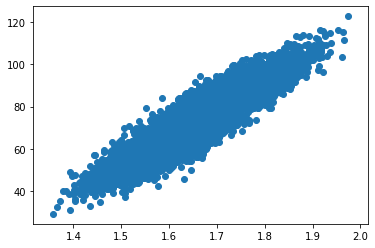

In [12]:
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
plt.scatter(height, weight)

In [13]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [14]:
from costs import compute_loss

w = np.array([1, 2])
compute_loss(y, tx, w, "MSE")

2694.4833658870843

# 2 Grid Search

Fill in the function `grid_search()` below:

Let us play with the grid search demo now!

Grid Search: loss*=15.610085652488802, w0*=73.36683417085428, w1*=12.8140703517588, execution time=2.390 seconds


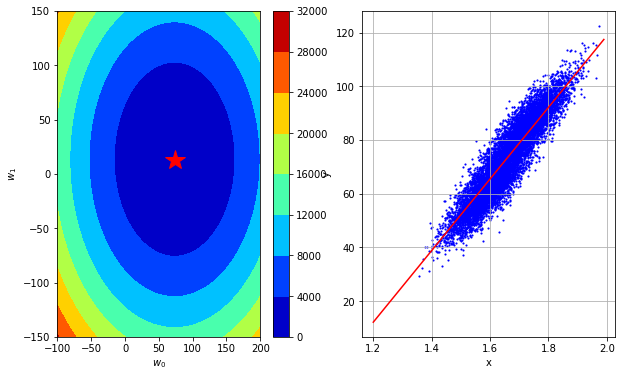

In [56]:
from grid_search import generate_w, get_best_parameters, grid_search
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=200)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1, "MSE")

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

Please fill in the functions `gradient_descent` below:

Test your gradient descent function through gradient descent demo shown below:

In [57]:
from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma, "MSE")
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=7.329392200210504, w1=1.3479712434989137
Gradient Descent(1/49): loss=2264.635056030004, w0=13.925845180399968, w1=2.561145362647917
Gradient Descent(2/49): loss=1837.2777140793808, w0=19.86265286257048, w1=3.6530020698820245
Gradient Descent(3/49): loss=1491.118267099377, w0=25.205779776523947, w1=4.635673106392713
Gradient Descent(4/49): loss=1210.7291150455733, w0=30.014593999082074, w1=5.520077039252335
Gradient Descent(5/49): loss=983.613901881992, w0=34.34252679938438, w1=6.316040578825998
Gradient Descent(6/49): loss=799.6505792194913, w0=38.23766631965647, w1=7.032407764442294
Gradient Descent(7/49): loss=650.6402878628652, w0=41.743291887901336, w1=7.67713823149696
Gradient Descent(8/49): loss=529.9419518639986, w0=44.89835489932172, w1=8.257395651846164
Gradient Descent(9/49): loss=432.17629970491663, w0=47.73791160960007, w1=8.779627330160444
Gradient Descent(10/49): loss=352.98612145606, w0=50.29351264885058, w1=9.24963584

In [58]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_losses)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [65]:
# # Prova batch_iter
# batch_size = 10
# for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
#     print(minibatch_y)
#     print(minibatch_tx)
    
# # Cos'è un generator object?
# print(batch_iter(y, tx, batch_size))

In [78]:
from stochastic_gradient_descent import compute_stoch_gradient, stochastic_gradient_descent

# Define the parameters of the algorithm.
max_iters = 20
gamma = 0.2
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma, "MSE")
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/19): loss=2792.2367127591674, w0=16.63987941226994, w1=12.076883643403418
Stochastic Gradient Descent(1/19): loss=1621.2101230635133, w0=27.13595401798159, w1=0.819433560142059
Stochastic Gradient Descent(2/19): loss=1160.8062226749669, w0=36.81269436406309, w1=5.243456718829573
Stochastic Gradient Descent(3/19): loss=714.7438269691372, w0=44.246857969835844, w1=6.530388139762055
Stochastic Gradient Descent(4/19): loss=461.398406396323, w0=49.05057022880244, w1=6.57200355559461
Stochastic Gradient Descent(5/19): loss=333.11416145211234, w0=55.126717142810286, w1=12.538118886842138
Stochastic Gradient Descent(6/19): loss=180.85285327357954, w0=58.7123670425662, w1=10.504095600743183
Stochastic Gradient Descent(7/19): loss=126.12390815998111, w0=61.76953519138811, w1=11.011904802864022
Stochastic Gradient Descent(8/19): loss=84.83667080493154, w0=63.59125229472105, w1=9.868214117508867
Stochastic Gradient Descent(9/19): loss=68.97824764270536, w0=65.78611129

In [79]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=max_iters))

interactive(children=(IntSlider(value=1, description='n_iter', max=20, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

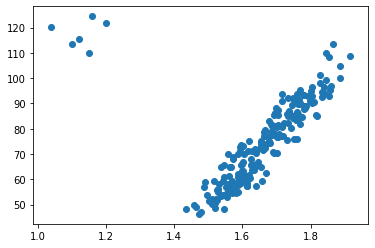

In [80]:
from matplotlib import pyplot

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
pyplot.scatter(height, weight)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

Grid Search: loss*=125.56027750378736, w0*=74.8743718592965, w1*=5.2763819095477515, execution time=0.671 seconds


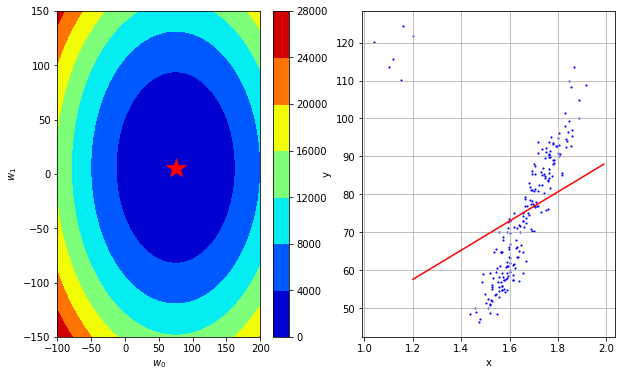

In [83]:
# Re-run grid seach for the dataset with outliers

from grid_search import generate_w, get_best_parameters, grid_search
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=200)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1, "MSE")

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)

In [86]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma, "MSE")
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

Gradient Descent(0/49): loss=2948.575280600539, w0=14.982486504733721, w1=1.1750308319737364
Gradient Descent(1/49): loss=1932.2250836577618, w0=26.968475708520714, w1=2.115055497552708
Gradient Descent(2/49): loss=1281.7609576143839, w0=36.55726707155031, w1=2.8670752300158813
Gradient Descent(3/49): loss=865.463916946622, w0=44.22830016197398, w1=3.4686910159864124
Gradient Descent(4/49): loss=599.0338109192545, w0=50.365126634312915, w1=3.9499836447628325
Gradient Descent(5/49): loss=428.51854306173954, w0=55.27458781218406, w1=4.335017747783967
Gradient Descent(6/49): loss=319.38877163293, w0=59.20215675448098, w1=4.643045030200872
Gradient Descent(7/49): loss=249.5457179184918, w0=62.34421190831851, w1=4.889466856134392
Gradient Descent(8/49): loss=204.84616354125143, w0=64.85785603138854, w1=5.086604316881207
Gradient Descent(9/49): loss=176.2384487398176, w0=66.86877132984456, w1=5.244314285478657
Gradient Descent(10/49): loss=157.92951126689994, w0=68.47750356860938, w1=5.37048

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

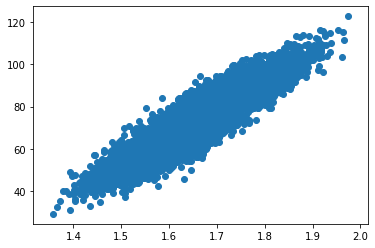

In [87]:
# Reload data without outliers
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
plt.scatter(height, weight)

Grid Search: loss*=4.470262201991329, w0*=73.36683417085428, w1*=12.8140703517588, execution time=2.565 seconds


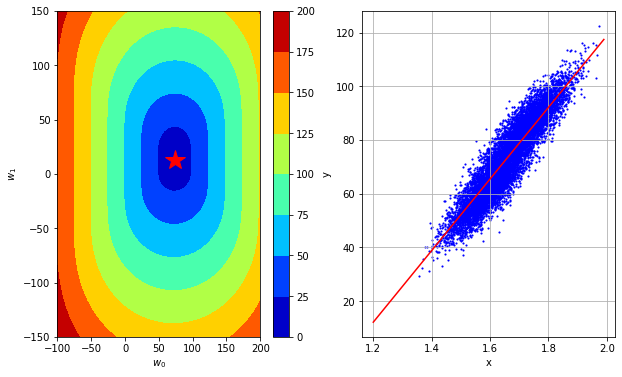

In [91]:
# Re-run grid seach for the MAE loss (dataset without outliers)

from grid_search import generate_w, get_best_parameters, grid_search
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=200)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1, "MAE")

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)

In [93]:
from gradient_descent import gradient_descent
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100
gamma = 1.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma, "MAE")
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

Gradient Descent(0/99): loss=73.29392200210518, w0=1.5, w1=-3.956301952712238e-15
Gradient Descent(1/99): loss=71.79392200210518, w0=3.0, w1=-7.912603905424477e-15
Gradient Descent(2/99): loss=70.29392200210518, w0=4.5, w1=-1.1868905858136716e-14
Gradient Descent(3/99): loss=68.79392200210518, w0=6.0, w1=-1.5825207810848953e-14
Gradient Descent(4/99): loss=67.29392200210518, w0=7.5, w1=-1.978150976356119e-14
Gradient Descent(5/99): loss=65.79392200210518, w0=9.0, w1=-2.373781171627343e-14
Gradient Descent(6/99): loss=64.29392200210518, w0=10.5, w1=-2.7694113668985666e-14
Gradient Descent(7/99): loss=62.79392200210518, w0=12.0, w1=-3.1650415621697907e-14
Gradient Descent(8/99): loss=61.29392200210518, w0=13.5, w1=-3.5606717574410144e-14
Gradient Descent(9/99): loss=59.79392200210518, w0=15.0, w1=-3.956301952712238e-14
Gradient Descent(10/99): loss=58.29392200210518, w0=16.5, w1=-4.351932147983462e-14
Gradient Descent(11/99): loss=56.79392200210517, w0=18.0, w1=-4.747562343254686e-14
Gra

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [94]:
from stochastic_gradient_descent import compute_stoch_gradient, stochastic_gradient_descent

# Define the parameters of the algorithm.
max_iters = 20
gamma = 0.2
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma, "MAE")
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

NameError: name 'np' is not defined